In [26]:
url = 'https://en.wikipedia.org/wiki/Data_science'

In [27]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"19800d2d-bd85-4635-bd62-e159873d0938","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1110220572,"wgRevisionId":1110220572,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer occupations","Comput

In [28]:
from html.parser import HTMLParser

class Parser(HTMLParser):
  script = False
  res = ""
  def handle_starttag(self, tag, attrs):
    if tag.lower() in ["string", "style"]:
      self.script = True
  def handle_endtag(self, tag):
    if tag.lower() in ["string", "style"]:
      self.script = False
  def handle_data(self, data):
    if str.strip(data) == "" or self.script:
      return
    self.res += ' ' + data.replace('[ edit ]','')

parser = Parser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"19800d2d-bd85-4635-bd62-e159873d0938","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1110220572,"wgRevisionId":1110220572,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer occupations","Computational fields of study","Data analysis"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRelevantPa

In [22]:
import sys
!{sys.executable} -m pip install nlp_rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2, min_freq=3, min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('deriving knowledge', 3.916666666666667),
 ('data science', 3.915254237288136),
 ('information science', 3.915254237288136),
 ('computer science', 3.915254237288136),
 ('application domains', 3.75),
 ('data analysis', 3.7142857142857144),
 ('interdisciplinary field', 3.571428571428571),
 ('wikimedia foundation', 3.5555555555555554),
 ('study focused', 3.55),
 ('science', 1.9152542372881356),
 ('field', 1.5714285714285714),
 ('wikimedia', 1.5555555555555556),
 ('organization', 1.3333333333333333),
 ('wikipedia', 1.2857142857142858),
 ('statistics', 1.2380952380952381),
 ('insights', 1.1666666666666667),
 ('false', 1.0),
 ('styles', 1.0),
 ('ready', 1.0),
 ('jquery', 1.0),
 ('visualeditor', 1.0),
 ('gadget', 1.0),
 ('rlq=window', 1.0),
 ('rlq||', 1.0),
 ('function', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0),
 ('https', 1.0),
 ('li

In [24]:
!{sys.executable} -m pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


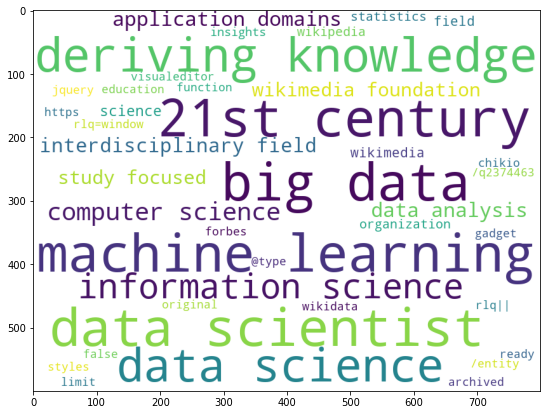

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

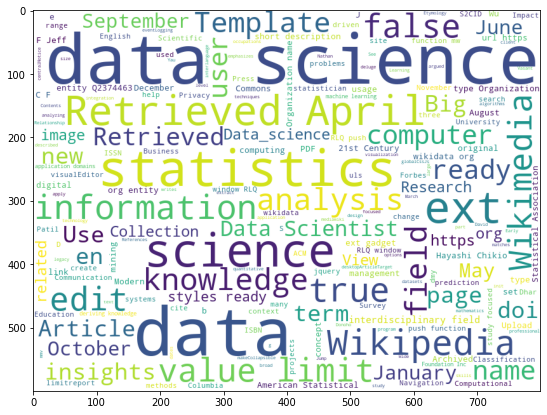

In [31]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))